In [1]:
# coding: utf-8
import pandas as pd

df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None
)

# 全件表示する
pd.set_option('display.max_rows', None)

print(df)

       0    1    2    3                4
0    5.1  3.5  1.4  0.2      Iris-setosa
1    4.9  3.0  1.4  0.2      Iris-setosa
2    4.7  3.2  1.3  0.2      Iris-setosa
3    4.6  3.1  1.5  0.2      Iris-setosa
4    5.0  3.6  1.4  0.2      Iris-setosa
5    5.4  3.9  1.7  0.4      Iris-setosa
6    4.6  3.4  1.4  0.3      Iris-setosa
7    5.0  3.4  1.5  0.2      Iris-setosa
8    4.4  2.9  1.4  0.2      Iris-setosa
9    4.9  3.1  1.5  0.1      Iris-setosa
10   5.4  3.7  1.5  0.2      Iris-setosa
11   4.8  3.4  1.6  0.2      Iris-setosa
12   4.8  3.0  1.4  0.1      Iris-setosa
13   4.3  3.0  1.1  0.1      Iris-setosa
14   5.8  4.0  1.2  0.2      Iris-setosa
15   5.7  4.4  1.5  0.4      Iris-setosa
16   5.4  3.9  1.3  0.4      Iris-setosa
17   5.1  3.5  1.4  0.3      Iris-setosa
18   5.7  3.8  1.7  0.3      Iris-setosa
19   5.1  3.8  1.5  0.3      Iris-setosa
20   5.4  3.4  1.7  0.2      Iris-setosa
21   5.1  3.7  1.5  0.4      Iris-setosa
22   4.6  3.6  1.0  0.2      Iris-setosa
23   5.1  3.3  1

In [2]:
import numpy as np

# y: 目的変数 Iris-setosa=-1, Iris-versicolor=1
# [1, 1, 1, ..., -1, -1, -1...]
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# X: トレーニング変数 [がくの長さ, 花弁の長さ]の一覧
# [[5.1, 1.4], [4.9, 1.4], [4.7, 1.3], ...]
X = df.iloc[0:100, [0, 2]].values

print('y\n', y)
print('X\n', X)

y
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]
X
 [[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  

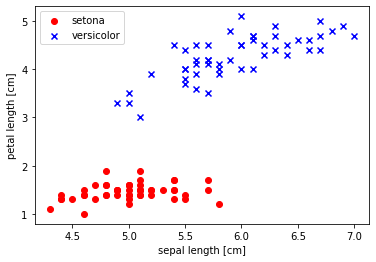

In [3]:
"""
グラフ表示(散布図)
"""

import matplotlib.pyplot as plt

data_count = 50

plt.scatter(X[:data_count, 0], X[:data_count, 1], color='red', marker='o', label='setona')
plt.scatter(X[50:50 + data_count, 0], X[50:50 + data_count, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [4]:
"""
Perceptronの処理クラス
fit()で学習し、predict()で予測できるようになる
"""

class Perceptron(object):
    # コンストラクタ
    def __init__(self, eta=0.01, n_iter=10):
        # 学習率 0.0〜1.0
        self.eta = eta
        
        # トレーニング回数
        self.n_iter = n_iter
        
    # トレーニング
    def fit(self, X, y):
        # X: トレーニング変数 今回は、2　x　N
        # y: 目的変数

        # 重み(トレーニング結果)
        self.w_ = np.zeros(1 + X.shape[1])
        
        # トレーニングN回目のエラー回数（誤分類回数）
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                # 予測値が正解していたら0, 外していたら符号 * 2 * 学習率
                update = self.eta * (target - self.predict(xi))
                
                # 重みの更新
                self.w_[1:] += update * xi
                self.w_[0] += update
                
                errors += int(update != 0.0)
            self.errors_.append(errors)

        return self

    # 総入力を計算
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # 分類の予測
    # 特徴量（X)を元に、一致なら1、不一致なら-1を返却する
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) 

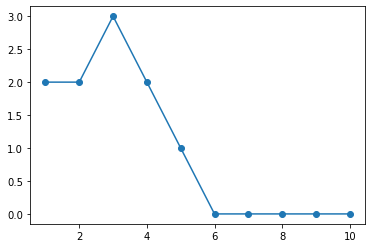

In [5]:
"""
Perceptronの処理実行
"""

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

In [6]:
"""
グラフ表示関数
"""

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('o', 'x')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    print(cmap)
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    Z = classifier.predict(
        np.array([
            xx1.ravel(),
            xx2.ravel(),
        ]).T
    )
    
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,c=cmap(idx),
            marker=markers[idx],
            label=cl
        )

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


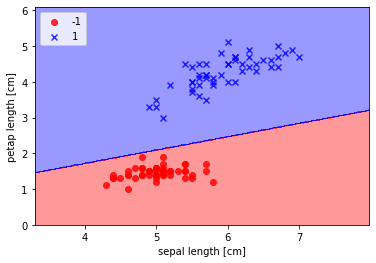

In [7]:
"""
処理結果のグラフ表示
赤背景のデータだとsetosa、青背景のデータだとversicolorとして分類される
"""

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petap length [cm]')

plt.legend(loc='upper left')

plt.show()